In [ ]:
!pip install numpy==1.26.4


In [2]:
!pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
df=pd.read_csv('Reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

The 'Text' column is the one on which the sentimental analysis is going to be performed 

In [5]:
df.shape # the dataset contains a half a million reviews and 10 attributes for each of the review 

(568454, 10)

In [16]:
# a sample from the datset will be used to perform the sentimental analysis because handling a massive amount of data can be resource intensive both in terms of memory and processing power 
# excessive memory usage can lead to swapping or crashing 
#increased processing power can slow down the system 
#thats th reason why only 500 is taken 
df=df.head(500)


In [10]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
df['Score'].value_counts()

Score
5    339
4     70
3     37
1     36
2     18
Name: count, dtype: int64

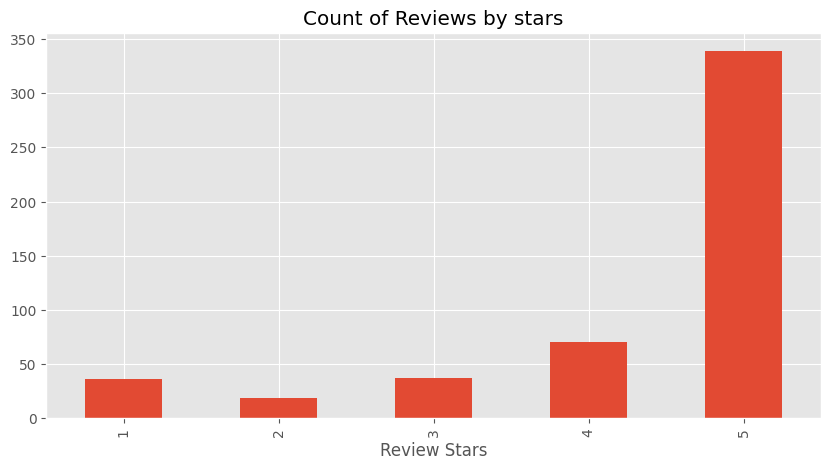

In [8]:
ax=df['Score'].value_counts().sort_index().plot(kind='bar',title='Count of Reviews by stars',figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()
#sort_index() ensures that the bar plot will display the review counts in ascending order of star ratings

VADER sentimental scoring takes all words in a sentence and assigns them with a categorical value as good/bad/neutral and in the end tells us how positive/negative the statement is . 

It is mathematics based and does not really consider the meaning of the words and the relationsip between the words .

It uses a BAG OF WORDS approach to 
remove stop words,
assign a score to each word and then provide a combined score 

In [9]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\deeks\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


[nltk_data] Downloading package vader_lexicon to
[nltk_data] C:\Users\deeks\AppData\Roaming\nltk_data... 
why is this downloaded in some other location and not in the location where my notebook is currently located

The NLTK (Natural Language Toolkit) library has a default setup for downloading and storing data packages like the VADER lexicon. By default, it downloads these resources to a common directory, typically C:\Users\deeks\AppData\Roaming\nltk_data on Windows, or similar locations on other operating systems. This ensures that the data is accessible across different projects and notebooks, without the need to download it multiple times.


The VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon is a list of lexical features (words) that are generally labeled as positive, negative, or neutral, along with their respective intensity scores. It's used by the SentimentIntensityAnalyzer in NLTK to perform sentiment analysis.

How It Works:
When you use SentimentIntensityAnalyzer on a piece of text, it breaks down the text into its constituent words, looks up each word in the VADER lexicon, and calculates a sentiment score for the entire text. It also considers the context rules to adjust the final sentiment score accordingly.

This makes VADER a powerful tool for quick and accurate sentiment analysis, especially for social media and other informal text.



In [10]:
res={}
for i, row in tqdm(df.iterrows(),total=len(df)):
    text=row['Text']
    myid=row['Id']
    res[myid]=sia.polarity_scores(text)
"""polarity_scores() has four components as neg,neu,pos
which are self explanatory and a 'compound'
which is a total score which ranges from -4 tp +4"""

  0%|          | 0/500 [00:00<?, ?it/s]

"polarity_scores() has four components as neg,neu,pos\nwhich are self explanatory and a 'compound'\nwhich is a total score which ranges from -4 tp +4"

In [15]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [11]:
#convert the res dictionary to a pandas dataframe to make it easier to work with 
vaders=pd.DataFrame(res)
vaders=vaders.T
vaders=vaders.reset_index().rename(columns={'index':'Id'})
vaders=vaders.merge(df,how='left')
vaders#vaders now has both the sentiment score and metadata

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


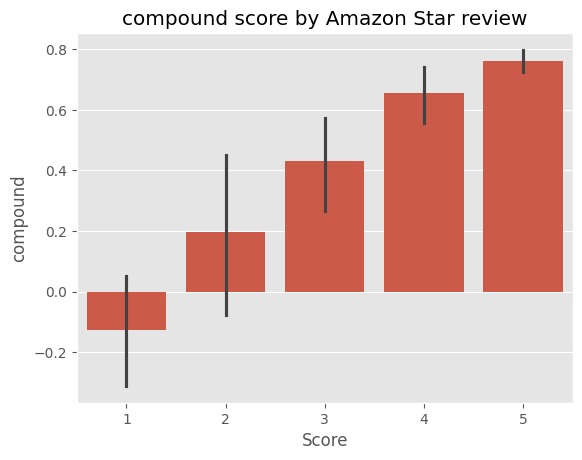

In [12]:
ax=sns.barplot(data=vaders,x='Score',y='compound')
ax.set_title("compound score by Amazon Star review")
plt.show()

In a seaborn bar plot, the line that passes through the top of the rectangle boxes typically represents the confidence interval for the mean value of each bar.

Confidence Interval
A confidence interval gives an estimated range of values which is likely to include the parameter of interest (in this case, the mean compound score) and is usually calculated with a given level of confidence (like 95%).

By default, seaborn calculates and adds these confidence intervals to bar plots to give a visual indication of the variability or uncertainty around the mean values.

Here’s a quick breakdown:

The height of each bar shows the mean value of the compound score for each Score.

The line (or error bar) extending from the top of each bar shows the range within which the true mean value is likely to fall, based on the data.

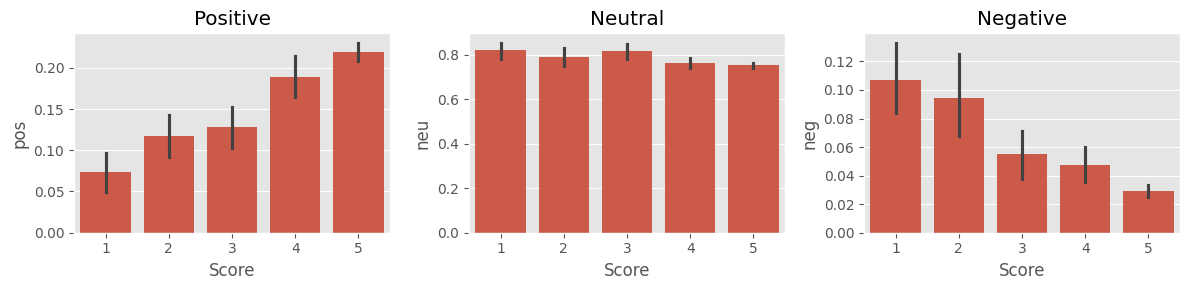

In [13]:
fig,axs=plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=vaders,x='Score',y='pos',ax=axs[0])
sns.barplot(data=vaders,x='Score',y='neu',ax=axs[1])
sns.barplot(data=vaders,x='Score',y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()


In [19]:
!pip install transformers
!pip install scipy


   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/46.2 MB ? eta -:--:--
    --------------------------------------- 0.8/46.2 MB 2.6 MB/s eta 0:00:18
   - -------------------------------------- 1.6/46.2 MB 2.8 MB/s eta 0:00:16
   - -------------------------------------- 2.1/46.2 MB 2.8 MB/s eta 0:00:16
   -- ------------------------------------- 2.6/46.2 MB 2.6 MB/s eta 0:00:17
   -- ------------------------------------- 2.9/46.2 MB 2.6 MB/s eta 0:00:17
   -- ------------------------------------- 3.4/46.2 MB 2.5 MB/s eta 0:00:18
   --- ------------------------------------ 3.7/46.2 MB 2.5 MB/s eta 0:00:18
   --- ------------------------------------ 3.7/46.2 MB 2.5 MB/s eta 0:00:18
   --- ------------------------------------ 3.9/46.2 MB 1.9 MB/s eta 0:00:23
   --- ------------------------------------ 3.9/46.2 MB 1.9 MB/s eta 0:00:23
   --- ------------------------------------ 3.9/46.2 MB 1.9 MB/s eta 0:00:23
   --- ------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datashader 0.14.1 requires numba>=0.51, which is not installed.
scikit-learn-intelex 2021.20221004.171935 requires daal4py>=2021.2, which is not installed.


In [14]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
!pip install torch


In [ ]:
!pip install tensorflow


In [15]:
MODEL=f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

In [19]:
def polarity_scores_roberta(example):
    encoded_text=tokenizer(example,return_tensors='pt')
    output=model(**encoded_text)
    scores=output[0][0].detach().numpy()
    scores=softmax(scores)
    scores_dict={
        'roberta_neg':scores[0],
        'roberta_neu':scores[1],
        'roberta_pos':scores[2]
    }
    return scores_dict

In [20]:
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
    try:
        text=row['Text']
        myid=row['Id']
        vader_result=sia.polarity_scores(text)
        vader_result_rename={}
        for key,value in vader_result.items():
            vader_result_rename[f"vader_{key}"]=value
        roberta_result=polarity_scores_roberta(text)
        both={**vader_result_rename,**roberta_result}
        res[myid]=both
    except RuntimeError:
        print(f'broke for id {myid}')
    

  0%|          | 0/500 [00:00<?, ?it/s]

broke for id 83
broke for id 187


In [21]:
results_df=pd.DataFrame(res).T
results_df=results_df.reset_index().rename(columns={'index':'Id'})
results_df=results_df.merge(df,how='left')

In [22]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [23]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

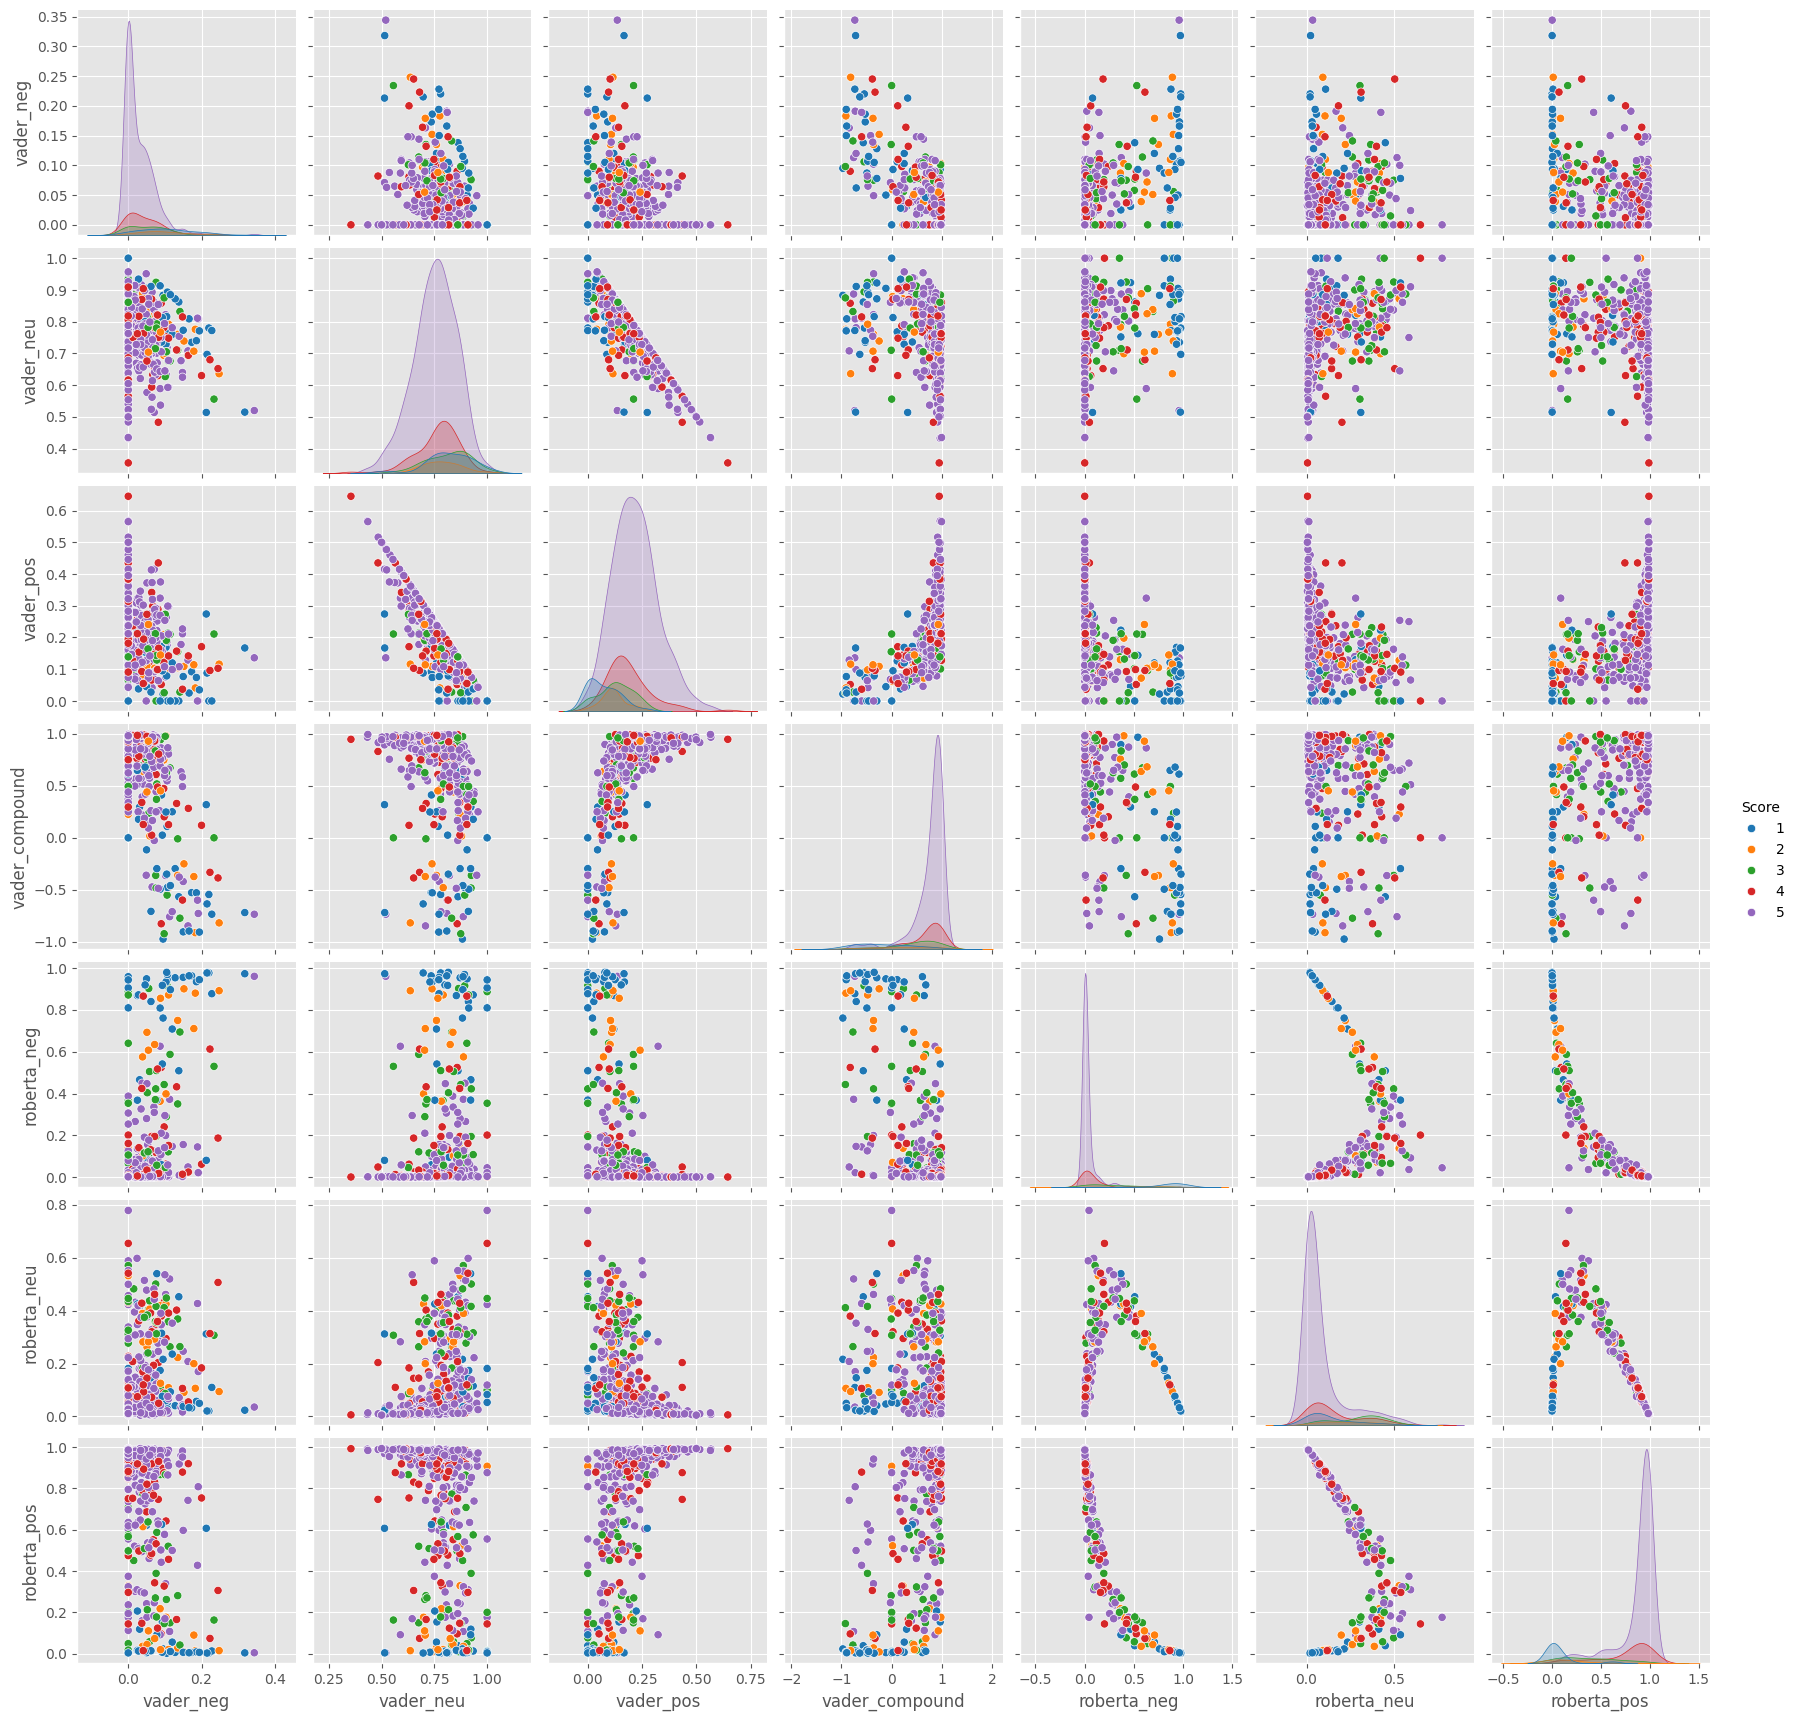

In [26]:
#comparing the scores 
sns.pairplot(data=results_df,vars=['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos'],hue='Score',palette='tab10')
plt.show()

In [28]:
#review the examples 
results_df.query('Score==1').sort_values('roberta_pos',ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [29]:
results_df.query('Score==1').sort_values('vader_pos',ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [30]:
#negative sentiment 5-star review

In [31]:
results_df.query('Score==5').sort_values('roberta_neg',ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [32]:
results_df.query('Score==5').sort_values('vader_neg',ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'